In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utility_functions import *

# Date Preproccesing
### Committee dataset

In [20]:
c_df = pd.read_csv(f"../data/1 - Original data/CommitteeData.csv", index_col=0).rename(
    {"DocumentCommitteeSessionID": "SessionID", "RawText": "QuoteText"}, axis=1)
c_df.head()

,Index,Speaker,QuoteText,$Type,SessionID,StartDate,PersonID
0,1,"היו""ר צחי הנגבי:","רבותיי, תודה לכולם על ההגעה בהתראה קצרה. סוף-ס...",Committee,290069,2015-06-01 16:30:00,467.0
1,2,חמד עמאר:,"לא, יש לך רביזיה. כבר עכשיו אני אומר.",Committee,290069,2015-06-01 16:30:00,12938.0
2,3,"היו""ר צחי הנגבי:","אוקיי, אתם כרגע האופוזיציה, אתה אומר.",Committee,290069,2015-06-01 16:30:00,467.0
3,4,אחמד טיבי:,איזו הרגשה טובה שלא אני צריך למחות אלא ישראל ב...,Committee,290069,2015-06-01 16:30:00,560.0
4,5,"היו""ר צחי הנגבי:",אתה רוצה להסביר? כי אני לא מכיר שיש לכם בעיה.,Committee,290069,2015-06-01 16:30:00,467.0


### Plenum dataset

In [21]:
p_df = pd.read_csv(f"../data/1 - Original data/PlenumData.csv", index_col=0).rename(
    {"DocumentPlenumSessionID": "SessionID", "RawText": "QuoteText"}, axis=1)
p_df.head()

,Index,Speaker,QuoteText,$Type,SessionID,StartDate,PersonID
0,1,"היו""ר יולי יואל אדלשטיין:","חברי הכנסת, היום יום שני, י""ד בסיוון תשע""ה, 1 ...",Plenum,308385,2015-06-01 16:00:00,532.0
1,2,"היו""ר יולי יואל אדלשטיין:","חברי הכנסת, שימו לב, אני מתכבד להודיע, בהתאם ל...",Plenum,308385,2015-06-01 16:00:00,532.0
2,3,"היו""ר יולי יואל אדלשטיין:",ברכותינו לחבר הכנסת יצחק הרצוג.,Plenum,308385,2015-06-01 16:00:00,532.0
3,4,"היו""ר יולי יואל אדלשטיין:","מעתה לא אצטרך לכנות אותו ""ראש האופוזיציה המיוע...",Plenum,308385,2015-06-01 16:00:00,532.0
4,5,יצחק הרצוג (המחנה הציוני):,תודה רבה.,Plenum,308385,2015-06-01 16:00:00,1044.0


### Preproccessing and creating the joined dataset

In [22]:
original_df = pd.concat([p_df, c_df])

In [23]:
# Drop quotes from irrelevant speakers (who are not parliament members):
relevant_speakers, irrelevant_speakers = get_relevant_speakers(original_df)
f_df = original_df[original_df.Speaker.isin(relevant_speakers)]

In [24]:
# Add character and word count columns for quotes:
f_df['QuoteLen'] = f_df['QuoteText'].str.len()
f_df['QuoteWordCount'] = f_df["QuoteText"].apply(lambda x: len(str(x).split(" ")))

#remove punctuation from quotes
f_df['QuoteTextNoPunct'] = f_df['QuoteText'].str.replace(r'[.,:"\'!?()]+', '')

# Drop irrelevant quotes -too short (less than 15 words) or too long (more than 150 words):
f_df.drop(f_df[(f_df['QuoteWordCount'] <= 15) | (f_df['QuoteWordCount'] > 150)].index, inplace=True)

C:\Users\nitza\AppData\Local\Temp\ipykernel_15544\501848543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['QuoteLen'] = f_df['QuoteText'].str.len()
C:\Users\nitza\AppData\Local\Temp\ipykernel_15544\501848543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['QuoteWordCount'] = f_df["QuoteText"].apply(lambda x: len(str(x).split(" ")))
C:\Users\nitza\AppData\Local\Temp\ipykernel_15544\501848543.py:6: FutureWarning: The default value of regex will change from True to False in a future version

In [25]:
# Add a column for quote cleaned from stopwords:
f_df.loc[:, "NonStopwordsQuoteText"] = f_df.QuoteTextNoPunct.apply(get_non_stop_words)

C:\Users\nitza\AppData\Local\Temp\ipykernel_15544\2649342654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df.loc[:, "NonStopwordsQuoteText"] = f_df.QuoteTextNoPunct.apply(get_non_stop_words)


In [26]:
# drop null rows
f_df["NonStopwordsQuoteText"].dropna(inplace=True)

# Drop irrelevant quotes -too short after removing stopwords:
f_df['QuoteWordCountClean'] = f_df["NonStopwordsQuoteText"].apply(lambda x: len(str(x).split(" ")))
f_df.drop(f_df[(f_df['QuoteWordCountClean'] <= 8)].index, inplace=True)
# Drop irrelevant quotes -quotes from the very start of each meeting:
f_df.drop(f_df[f_df['Index'] > 5].index, inplace=True)

C:\Users\nitza\AppData\Local\Temp\ipykernel_15544\3607342066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df["NonStopwordsQuoteText"].dropna(inplace=True)
C:\Users\nitza\AppData\Local\Temp\ipykernel_15544\3607342066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['QuoteWordCountClean'] = f_df["NonStopwordsQuoteText"].apply(lambda x: len(str(x).split(" ")))
C:\Users\nitza\AppData\Local\Temp\ipykernel_15544\3607342066.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [27]:
# format and save to csv
final_df = f_df[['PersonID', 'Speaker', 'QuoteText', 'NonStopwordsQuoteText', 'QuoteWordCount', 'QuoteLen', 'StartDate', '$Type']]
final_df.drop_duplicates(subset=['NonStopwordsQuoteText'], keep='first', inplace=True)
final_df.to_csv("../data/1 - Original data/PreprocessedData.csv", index=False)
final_df.head()

C:\Users\nitza\AppData\Local\Temp\ipykernel_15544\2065749537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop_duplicates(subset=['NonStopwordsQuoteText'], keep='first', inplace=True)


,PersonID,Speaker,QuoteText,NonStopwordsQuoteText,QuoteWordCount,QuoteLen,StartDate,$Type
38901,48.0,מזכירת הכנסת ירדנה מלר-הורוביץ:,לקריאה שנייה ולקריאה שלישית: הצעת חוק ההתיישנו...,שנייה ולקריאה שלישית ההתיישנות 5 התשעה–2015 שה...,16,106,2015-07-28 16:00:00,Plenum
90977,48.0,מזכירת הכנסת ירדנה מלר-הורוביץ:,"לקריאה ראשונה, מטעם הכנסת: הצעת חוק ההוצאה לפו...",מטעם ההוצאה לפועל 49 מניעת עיקול מיטלטלין המשמ...,25,147,2015-11-30 16:00:00,Plenum
110394,48.0,מזכירת הכנסת ירדנה מלר-הורוביץ:,"ברשות יושב-ראש הכנסת, הנני מתכבדת להודיעכם, כי...",ברשות יושב-ראש הנני להודיעכם הונחו שולחן מסקנו...,29,176,2015-12-30 11:00:00,Plenum
147226,488.0,"היו""ר יצחק וקנין:","כהרגלנו ביום רביעי, פותחים בשאילתות דחופות. שא...",כהרגלנו רביעי פותחים בשאילתות דחופות שאילתה דח...,36,190,2016-03-02 11:00:00,Plenum
147228,30080.0,רחל עזריה (כולנו):,"בוקר טוב, צהריים טובים, תודה על ההזדמנות. בישר...",צהריים ההזדמנות בישראל מסורבות גט בתופעה רחבת ...,20,114,2016-03-02 11:00:00,Plenum


## Datasets Analysis
Total number of documents

In [28]:
len(original_df['SessionID'].unique())

13410

Number of unique speakers

In [29]:
len(original_df['Speaker'].unique())

72731

Number of relevant speakers

In [30]:
len(relevant_speakers)

44183

Total number of quotes

In [31]:
original_df.shape[0]

5524811

In [32]:
f_df.shape[0]

33113

Total number of unique quotes

In [33]:
original_df['QuoteText'].describe()

count     5524811
unique    4588365
top         הצבעה
freq        34735
Name: QuoteText, dtype: object

Number of words per qoute

In [34]:
print(f"mean: {f_df['QuoteWordCount'].mean()}")
print(f"min: {f_df['QuoteWordCount'].min()}")
print(f"max: {f_df['QuoteWordCount'].max()}")

mean: 60.38413915984658
min: 16
max: 150


Stats on quote length

In [35]:
print(f"Average quote: {int(f_df['QuoteLen'].mean())} characters.\n")
short_quote = f_df[f_df['QuoteLen'] == f_df['QuoteLen'].min()]["QuoteText"].head(1)
long_quote = f_df[f_df['QuoteLen'] == f_df['QuoteLen'].max()]["QuoteText"].head(1)
print(f"Shortest quote: {f_df['QuoteLen'].min()} characters. Quotes is: \n{short_quote}\n")
print(f"Longest quote: {f_df['QuoteLen'].max()} characters Quote is: \n{long_quote}")


Average quote: 333 characters.

Shortest quote: 72 characters. Quotes is: 
2943777    הם הביאו צו לפני חצי שנה שבעצם פקע ביוני והם ה...
Name: QuoteText, dtype: object

Longest quote: 1024 characters Quote is: 
2500830    "נִפָּגֵשָׁה בִּקְצֵה הַמִּשְׁעוֹל/ כּוֹכָבִים...
Name: QuoteText, dtype: object


## Word & Bigram Frequency Analysis

In [3]:
stop_words = get_stopwords()
text = f_df["QuoteText"]

<AxesSubplot:>

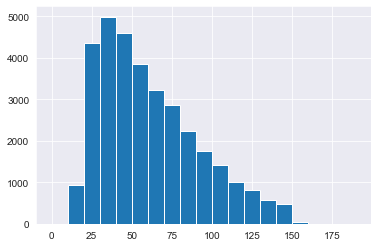

In [37]:
f_df['QuoteWordCount'].hist(bins=range(0, 200, 10))

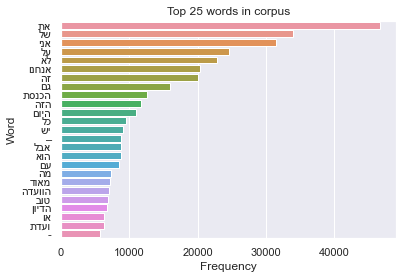

['החינוך', 'הדברים', 'העבודה', 'הבריאות', 'צריכים', 'הקורונה', 'האוצר', 'הפנים', 'הכלכלה', 'בישראל', 'הכספים', 'איתנו', 'נשים', 'הציבור', 'נתחיל', 'הרווחה', 'במסגרת', 'יכולים', 'הסביבה', 'דיונים', 'המשרד', 'הקודם', 'אותנו', 'העניין', 'אומרת']


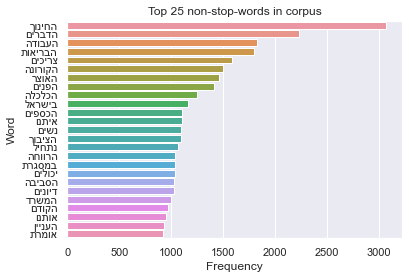

In [5]:
plot_top_n_words_hist(text, 25, stop_words, plot_non_stopwords=True, print_non_stopwords=True)

[('סדר היום', 591), ('התשע 2016', 580), ('יושב ראש', 573), ('היושב ראש', 494), ('התשפ 2021', 401), ('התשע 2017', 383), ('על ידי', 306), ('התשע 2018', 289), ('התש 2020', 225), ('התשע 2015', 185), ('ליושב ראש', 140), ('התשפ 2020', 134), ('מנכ לית', 122), ('על פי', 110), ('מאוד מאוד', 106), ('יושבת ראש', 88), ('בסדר היום', 80), ('11 00', 80), ('לסדר היום', 74), ('כיושב ראש', 65), ('כהן פארן', 65), ('אי אפשר', 64), ('התשפ 2022', 63), ('אחר כך', 50), ('12 00', 50), ('התשע 2014', 47), ('הבין לאומי', 45), ('כל כך', 45), ('מועלם רפאלי', 45), ('על מנת', 42), ('10 00', 42), ('10 000', 40), ('המנכ לית', 40), ('חוק יסוד', 39), ('היושבת ראש', 35), ('מנכ לים', 34), ('50 000', 33), ('ואחר כך', 31), ('14 00', 31), ('בר לב', 30), ('תל אביב', 28), ('מנכ לי', 27), ('מיושב ראש', 27), ('16 00', 27), ('13 00', 27), ('100 000', 26), ('הח כים', 26), ('12 2016', 26), ('סעיף סעיף', 25), ('20 000', 25), ('סוף סוף', 24), ('10 30', 24), ('למנכ לית', 23), ('שיושב ראש', 23), ('2017 2018', 23), ('40 000', 22), ('המנכ

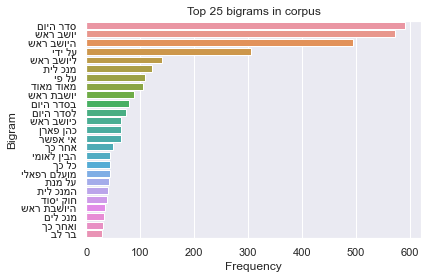

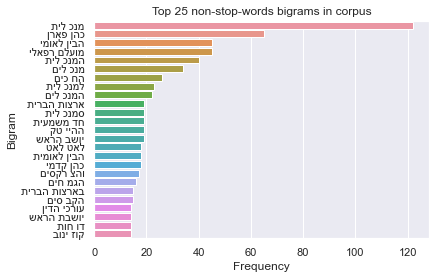

In [4]:
plot_top_n_bigrams_hist(text, stop_words, 25, True)